# Exercise 1

In [58]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

data = digits["data"]
print(data.shape)
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


Shape of img:  (8, 8)


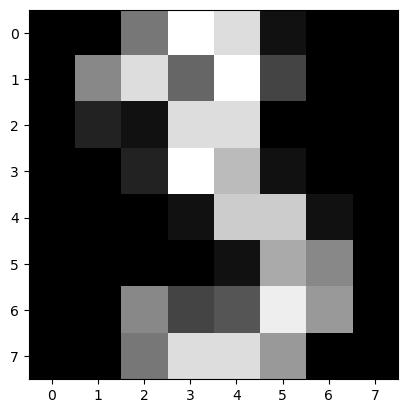

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# find all the indices of images that contain the digit 3 and take first
index = np.where(target == 3)[0][0]

# get the selected image
img = images[index]
assert 2 == len(img.shape)
print('Shape of img: ', img.shape)
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest") # also try interpolation="bicubic" plt.show()

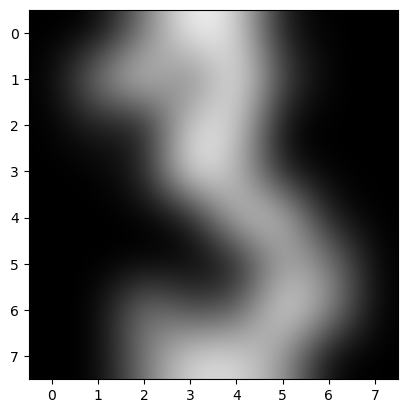

In [60]:
plt.imshow(img, interpolation="bicubic")
plt.show()

### Filter for 3 and 9

Filtered gold labels: 
 9
Filtered image flatten: 
 [ 0.  0.  5. 15.  7.  0.  0.  0.  0.  0. 14. 16. 16.  5.  0.  0.  0.  0.
 13. 14. 14. 15.  0.  0.  0.  0.  3. 11. 14. 16.  3.  0.  0.  0.  0.  0.
  6. 16.  2.  0.  0.  0.  0.  0.  4. 16.  7.  0.  0.  0.  0.  1. 11. 16.
  6.  0.  0.  0.  4. 15. 16. 10.  0.  0.]
Filtered image matrix: 
 [[ 0.  0.  5. 15.  7.  0.  0.  0.]
 [ 0.  0. 14. 16. 16.  5.  0.  0.]
 [ 0.  0. 13. 14. 14. 15.  0.  0.]
 [ 0.  0.  3. 11. 14. 16.  3.  0.]
 [ 0.  0.  0.  0.  6. 16.  2.  0.]
 [ 0.  0.  0.  0.  4. 16.  7.  0.]
 [ 0.  0.  0.  1. 11. 16.  6.  0.]
 [ 0.  0.  4. 15. 16. 10.  0.  0.]]


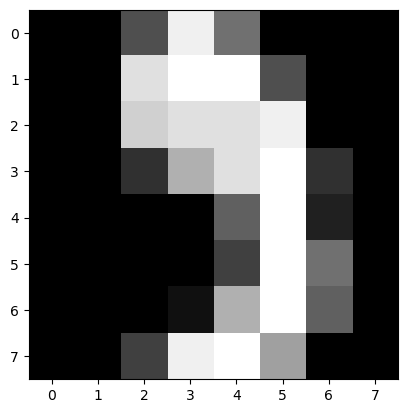

In [61]:
digits_to_filter = [3, 9]
filtered_target_9 = []
filtered_target_3 = []
filtered_target = []
filtered_images_9 = []
filtered_images_3 = []
filtered_images = []
filtered_data_9 = []
filtered_data_3 = []
filtered_data = []

indices = None

for digit in digits_to_filter:
    # find all the indices of images that contain the digit
    indices = np.where(target == digit)[0]
    # get the images and target labels
    imgs = images[indices]
    target_labels = np.full((len(indices),), digit)
    data_filter = data[indices]
    # add the images and target labels to the filtered lists
    if digit == 9:
        filtered_images_9.append(imgs)
        filtered_data_9.append(data_filter)
        filtered_target_9.append(target_labels)
    else:
        filtered_images_3.append(imgs)
        filtered_data_3.append(data_filter)
        filtered_target_3.append(target_labels)

filtered_images = filtered_images_3 + filtered_images_9
filtered_data = filtered_data_3 + filtered_data_9
filtered_target = filtered_target_3 + filtered_target_9

# concatenate the images and target labels and shuffle the list
filtered_images = np.concatenate(filtered_images, axis=0)
filtered_target = np.concatenate(filtered_target, axis=0)
filtered_data = np.concatenate(filtered_data, axis=0)
print('Filtered gold labels: \n', filtered_target[205])
print('Filtered image flatten: \n', filtered_data[205])
print('Filtered image matrix: \n', filtered_images[205])
plt.imshow(filtered_images[205], interpolation="nearest")
plt.show()

### Split data into test and train

In [62]:
from sklearn import model_selection
X_all = filtered_data 
y_all = filtered_target
X_train , X_test , y_train , y_test = model_selection.train_test_split(filtered_data, filtered_target,
test_size = 0.4, random_state = 0)
print(X_test.shape, y_test.shape)

(146, 64) (146,)


# Exercise 2

## 2.1

To facilitate visualization, you should construct a 2-dimensional feature space with any formula over the 64 original pixels you can come up with. You may, for example, choose two pixels that seem to have a big inuence for the distinction between 3's and 9's. To identify suitable pixels, you may want to look at the average images for the two classes  pixels that tend to be bright in one class and dark in the other are good candidates. You can also use some clever linear or non-linear combination of multiple pixels into 2 features, for example: f ̃ = 0.3f + 42 f13 and f ̃ = f − f .
1 23 f64 2 33 62 Of course, the quality of your features determines the achievable error and therefore is a limiting factor for the quality of your predictions. Your dimension reduction procedure should be callable
through a function features2d:
features = features2d(x)
where x is a #instances × 64 matrix and features has shape #instances × 2.

In [63]:
# compute the average values over all 3 images and over all 9 images separately
avg_3 = np.round(np.mean(filtered_data_9[0], axis=0), 1)
avg_9 = np.round(np.mean(filtered_data_3[0], axis=0), 1)

print("Average values over all 3 images:")
print(avg_3)

print("Average values over all 9 images:")
print(avg_9)

# compute the difference between the two averages
diff = np.abs(avg_3 - avg_9)

# find the coordinates of the maximum difference
max_diff_coords = np.argpartition(-diff.flatten(), 10)[:10]

print("List of 10 most different coordinates between 3 and 9:")
print(max_diff_coords)


Average values over all 3 images:
[ 0.   0.1  5.7 11.8 11.3  5.9  1.6  0.1  0.   2.4 12.7  9.6 10.1 11.4
  2.6  0.1  0.   3.7 12.5  5.6  8.3 14.1  3.2  0.   0.   2.  10.4 12.2
 13.2 14.1  3.8  0.   0.   0.2  2.9  5.2  5.1 11.6  4.8  0.   0.   0.2
  0.5  0.6  2.5  9.7  5.8  0.   0.   0.7  6.1  5.   5.8 10.5  5.2  0.1
  0.   0.1  5.7 12.  13.1  8.9  2.1  0.1]
Average values over all 9 images:
[ 0.   0.6  8.4 14.2 14.2  7.5  0.8  0.   0.   4.2 12.7  9.  11.3 12.
  2.1  0.   0.   2.2  3.7  3.1 12.   9.3  0.8  0.   0.   0.3  1.5  8.9
 14.3  5.6  0.1  0.   0.   0.1  1.   5.6 12.  11.3  2.2  0.   0.   0.4
  1.4  1.   4.4 12.1  6.3  0.   0.   0.9  7.1  6.2  8.3 13.   5.9  0.1
  0.   0.5  9.3 14.7 14.   8.7  1.4  0.1]
List of 10 most different coordinates between 3 and 9:
[29 36 18 26 21 30 58 20 27  4]


##### Features with max diff pixels as features

In [64]:
# compute the 2D features based on two pixels

def features2d(x):
    # compute the 2D features based on two pixels
    pixel1 = max_diff_coords[0]  # choose the first pixel
    pixel2 = max_diff_coords[1]  # choose the second pixel
    features = np.zeros((len(x), 2))
    features[:, 0] = x[:, pixel1]
    features[:, 1] = x[:, pixel2]
    return features

# test the function with some example data
X_all_2d = features2d(X_all)
X_all_2d[:10]


array([[ 1., 12.],
       [ 2., 15.],
       [12., 13.],
       [ 3.,  9.],
       [ 2., 15.],
       [ 6., 10.],
       [ 8., 12.],
       [ 2., 15.],
       [12., 13.],
       [12., 15.]])

##### Features from max differences per number

In [65]:
from itertools import combinations

def get_diff_pairs(lst):
    # Generate all combinations of index pairs
    index_pairs = list(combinations(range(len(lst)), 2))
    
    # Calculate the absolute differences for each index pair
    differences = [(i, j, abs(lst[i] - lst[j])) for i, j in index_pairs]
    
    # Sort the differences in ascending order
    sorted_differences = sorted(differences, key=lambda x: x[2], reverse=True)
    
    return sorted_differences

In [66]:
def find_max_diff_indice_tuples(diff_tuples, avg_list, threshold = 5):
    # Find the indices where the corresponding elements in the second list have a low difference
    indices = [candidate for candidate in diff_tuples if np.abs(avg_list[candidate[0]] - avg_list[candidate[1]]) <= threshold]
    # for i in indices:
        # print('Diff number one: ', i[2])
        # print('Diff number two: ', avg_list[i[0]] - avg_list[i[1]])
    return indices

In [67]:
diff_pairs_three = get_diff_pairs(avg_3)
diff_pairs_nines = get_diff_pairs(avg_9)
print("List of 10 most different pairs between 3 and 9:")
print(diff_pairs_three[:10])
print(diff_pairs_nines[::-1][:10])

List of 10 most different pairs between 3 and 9:
[(0, 21, 14.1), (0, 29, 14.1), (8, 21, 14.1), (8, 29, 14.1), (16, 21, 14.1), (16, 29, 14.1), (21, 23, 14.1), (21, 24, 14.1), (21, 31, 14.1), (21, 32, 14.1)]
[(55, 63, 0.0), (48, 56, 0.0), (47, 56, 0.0), (47, 48, 0.0), (42, 62, 0.0), (40, 56, 0.0), (40, 48, 0.0), (40, 47, 0.0), (39, 56, 0.0), (39, 48, 0.0)]


In [68]:
features_nine = find_max_diff_indice_tuples(get_diff_pairs(avg_3), avg_9, 0.1)[:2]
features_three = find_max_diff_indice_tuples(get_diff_pairs(avg_9), avg_3, 0.1)[:2]
best_features_nine = [candidate[:2] for candidate in features_nine]
best_features_three = [candidate[:2] for candidate in features_three]
print('Features nine: ', features_nine[:10])
print('Features three: ', features_three[:10])
print('Best feature for 3: ', best_features_three)
print('Best feature for 9: ', best_features_nine)

Features nine:  [(29, 35, 8.899999999999999), (21, 58, 8.399999999999999)]
Features three:  [(26, 53, 11.5), (36, 51, 5.8)]
Best feature for 3:  [(26, 53), (36, 51)]
Best feature for 9:  [(29, 35), (21, 58)]


In [69]:
def features2d_combined_diff(x):
    features = np.zeros((len(x), 2))
    features[:, 0] = np.abs(x[:, best_features_nine[0][0]] - x[:, best_features_nine[0][1]])
    features[:, 1] = np.abs(x[:, best_features_three[0][0]] - x[:, best_features_three[0][1]])
    return features


# test the function with some example data
X_all_2d_combined_diff = features2d_combined_diff(X_all)
X_all_2d[:10]

array([[ 1., 12.],
       [ 2., 15.],
       [12., 13.],
       [ 3.,  9.],
       [ 2., 15.],
       [ 6., 10.],
       [ 8., 12.],
       [ 2., 15.],
       [12., 13.],
       [12., 15.]])

## 2.2

#### Plot with simple feature distribution

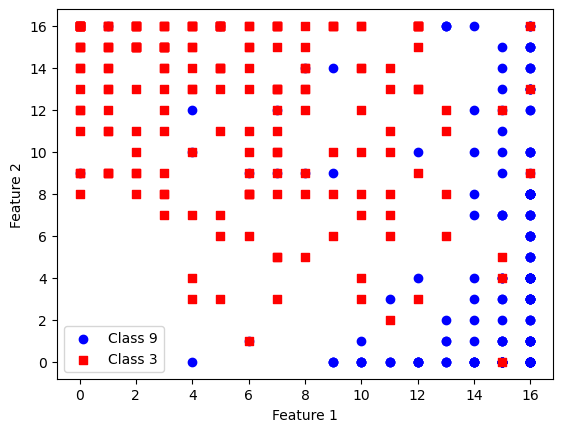

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# assume X_all is your instances x 2 feature list and Y_all is your list of gold labels
X1 = X_all_2d[:,0]  # extract the first feature from X_all
X2 = X_all_2d[:,1]  # extract the second feature from X_all

# create a scatter plot with two different markers for the two classes
plt.scatter(X1[y_all==9], X2[y_all==9], marker='o', color='blue', label='Class 9')
plt.scatter(X1[y_all==3], X2[y_all==3], marker='s', color='red', label='Class 3')

# set the labels for the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


#### Plot with combined feature distribution

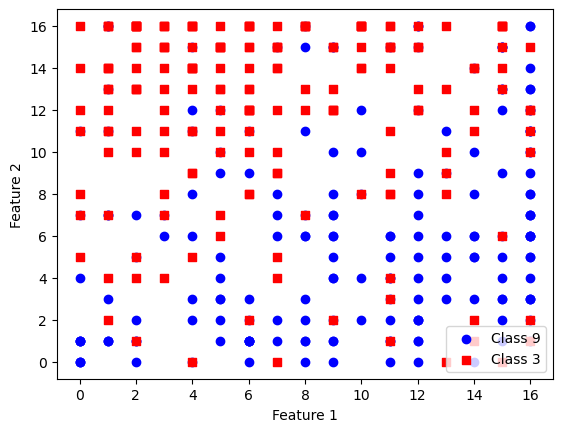

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# assume X_all is your instances x 2 feature list and Y_all is your list of gold labels
X1_comb = X_all_2d_combined_diff[:,0]  # extract the first feature from X_all
X2_comb = X_all_2d_combined_diff[:,1]  # extract the second feature from X_all

# create a scatter plot with two different markers for the two classes
plt.scatter(X1_comb[y_all==9], X2_comb[y_all==9], marker='o', color='blue', label='Class 9')
plt.scatter(X1_comb[y_all==3], X2_comb[y_all==3], marker='s', color='red', label='Class 3')

# set the labels for the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


## 2.3

### Nearest mean descision boundary

In [72]:
def nearest_mean(training_features, training_labels, test_features):
    # Compute the means of each class in the training set
    class3_mean = np.mean(training_features[np.argwhere(training_labels == -1)], axis=0)
    class9_mean = np.mean(training_features[np.argwhere(training_labels == 1)], axis=0)
    predicted_labels = []
    
    # Assign each test instance to the class with the closest mean
    for i in range(len(test_features)):
        test_instance = test_features[i]
        dist1 = np.linalg.norm(test_instance - class3_mean)
        dist2 = np.linalg.norm(test_instance - class9_mean)
        if dist1 < dist2:
            # Abbend -1 for class 3
            predicted_labels.append(-1)
        else:
            # Abbend 1 for class 9
            predicted_labels.append(1)
    return np.array(predicted_labels), np.array([class3_mean, class9_mean])


In [73]:
# Preparation of the data
X_train_2d = features2d(X_train)
X_test_2d = features2d(X_test)
X_train_2d_combined_diff = features2d_combined_diff(X_train)
X_test_2d_combined_diff = features2d_combined_diff(X_test)
y_train = np.where(y_train == 3, -1, np.where(y_train == 9, 1, y_train))
y_test = np.where(y_test == 3, -1, np.where(y_test == 9, 1, y_test))

In [74]:


# train the classifier and predict the labels for the test data
predicted_labels_test, class_means = nearest_mean(X_train_2d, y_train, X_test_2d)
predicted_labels_train = nearest_mean(X_train_2d, y_train, X_train_2d)[0]
predicted_labels_test_comb ,class_means_comb =  nearest_mean(X_train_2d_combined_diff, y_train, X_test_2d_combined_diff)
predicted_labels_train_comb = nearest_mean(X_train_2d_combined_diff, y_train, X_train_2d_combined_diff)[0]

# calculate the errors on the training and test data
train_error = np.mean(predicted_labels_train != y_train)
test_error = np.mean(predicted_labels_test != y_test)

train_error_combined_diff = np.mean(predicted_labels_train_comb != y_train)
test_error_combined_diff = np.mean(predicted_labels_test_comb != y_test)

# print the errors
print(f"Training error: {train_error}")
print(f"Test error: {test_error}")

print(f"Training error combined diff: {train_error_combined_diff}")
print(f"Test error combined diff: {test_error_combined_diff}")

Training error: 0.11981566820276497
Test error: 0.15753424657534246
Training error combined diff: 0.21658986175115208
Test error combined diff: 0.273972602739726


### Descision boundary implementation

In [75]:
def predict_static_weights(x_i, beta, bias):
    y_pred = np.sign(np.dot(x_i, beta) + bias)
    return y_pred

def classify_with_boundary(features, beta, bias):
    # Compute the means of each class in the training set
    predicted_labels = [int(predict_static_weights(x_i, beta, bias)) for x_i in features]
    
    return np.array(predicted_labels)

In [76]:
# define a more sophisticated decision boundary using beta (β) and b
beta = np.array([1, -1])
b = -0.5

# apply the decision boundary to the 2D features
train_prediction = classify_with_boundary(X_train_2d, beta, b)
test_prediction = classify_with_boundary(X_test_2d, beta, b)
train_prediction_comb = classify_with_boundary(X_train_2d_combined_diff, beta, b)
test_prediction_comb = classify_with_boundary(X_test_2d_combined_diff, beta, b)

# calculate the errors on the training and test data
train_error_b = np.mean(train_prediction != y_train)
test_error_b = np.mean(test_prediction != y_test)
train_error_b_comb = np.mean(train_prediction_comb != y_train)
test_error_b_comb = np.mean(test_prediction_comb != y_test)

# print the errors
print(f"Training error: {train_error_b}")
print(f"Test error: {test_error_b}")
print(f"Training error combined diff: {train_error_b_comb}")
print(f"Test error combined diff: {test_error_b_comb}")


Training error: 0.12442396313364056
Test error: 0.1643835616438356
Training error combined diff: 0.25806451612903225
Test error combined diff: 0.2465753424657534


### 2.4

In [77]:
def to_matrix(features, labels):
    # Step 1: Find maximum values for each dimension
    max_x = np.max(features[0])
    max_y = np.max(features[1])

    # Step 2: Create an empty matrix
    matrix = np.zeros((int(max_x + 1), int(max_y + 1)))

    # Step 3-4: Assign labels to matrix elements
    for idx, feature in enumerate(features):
        matrix[int(feature[0]-1), int(feature[1]-1)] = labels[idx]

    return matrix

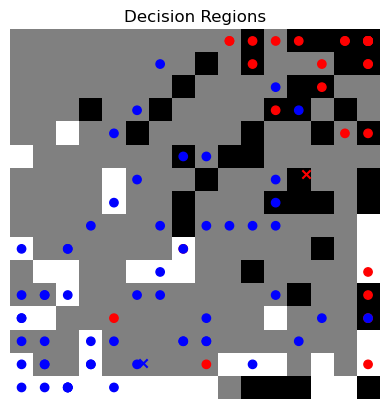

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Create a matrix for grid/image
predicted_labels_test_matrix = to_matrix(X_test_2d, predicted_labels_test)

fig, ax = plt.subplots()

X1 = X_test_2d[:,0]
X2 = X_test_2d[:,1]

# Plot feature test data in the 2D space as overlay
colors = ['blue' if label == -1 else 'red' for label in y_test.flatten()]
ax.scatter(X1, X2, c=colors)

# Plot class means as overlay
ax.scatter(class_means[0][0][1], class_means[0][0][0], marker='x', color='red', label='Class 3 mean')
ax.scatter(class_means[1][0][1], class_means[1][0][0], marker='x', color='blue', label='Class 9 mean')

# Set axis labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Regions')

# Display the image and scatter overlay
ax.imshow(predicted_labels_test_matrix)
plt.axis('off')
plt.show()

# Exercise 3


## 3.1

In [79]:
def fit_lda(training_features, training_labels):
    # compute the class means
    class_means = []
    for label in np.unique(training_labels):
        class_means.append(np.mean(training_features[np.argwhere(training_labels == label)], axis=0))
    class_means = np.array(class_means)
    # compute the covariance matrix
    covmat = np.cov(training_features.T)
    # compute the prior probabilities
    p = []
    for label in np.unique(training_labels):
        p.append(len(training_features[np.argwhere(training_labels == label)]) / len(training_labels))
    return class_means, covmat, p

filtered_X_train = X_train[:, np.var(X_train, axis=0) > 0.001]

mu, covmat, p = fit_lda(X_train_2d, y_train)
mu2, covmat2, p2 = fit_lda(filtered_X_train, y_train)

## 3.2

In [80]:
len_N_one = len(y_test[np.argwhere(y_test == 1)])
len_N_neg_one = len(y_test[np.argwhere(y_test == -1)])
def predict_lda(mu, covmat, p, test_features):
    predicted_labels = []
    for x_i in test_features:
        beta = np.dot(np.linalg.inv(covmat), (mu[0] - mu[1]).T)
        bias = -0.5 * np.dot(mu[0] - mu[1], beta) + np.log(len_N_one / len_N_neg_one)
        predicted_labels.append(np.sign(np.dot(x_i, beta) + bias))
    return predicted_labels
pred_labels_2d = predict_lda(mu, covmat, p, X_test_2d)

## 3.3

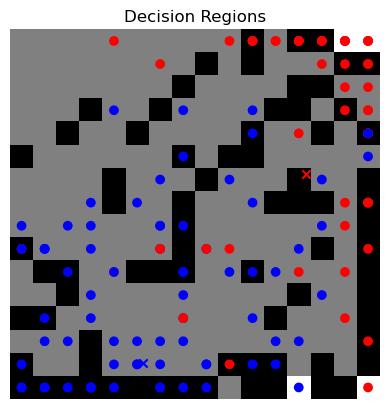

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Create a matrix for grid/image
predicted_labels_test_matrix = to_matrix(X_test_2d, pred_labels_2d)

fig, ax = plt.subplots()

X1 = X_train_2d[:,0]
X2 = X_train_2d[:,1]

# Plot feature test data in the 2D space as overlay
colors = ['blue' if label == -1 else 'red' for label in y_train.flatten()]
ax.scatter(X1, X2, c=colors)

# Plot class means as overlay
ax.scatter(class_means[0][0][1], class_means[0][0][0], marker='x', color='red', label='Class 3 mean')
ax.scatter(class_means[1][0][1], class_means[1][0][0], marker='x', color='blue', label='Class 9 mean')

# Set axis labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Regions')

# Display the image and scatter overlay
ax.imshow(predicted_labels_test_matrix)
plt.axis('off')
plt.show()

# 3.4

In [82]:
def accuracy_score(y_true, y_pred):
    tp = 0
    tn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
    return (tp + tn) / len(y_true)

In [83]:
#from sklearn.datasets import load_digits
#from sklearn.model_selection import KFold
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#import numpy as np
#
#digits = load_digits()
#
## Load your feature data and corresponding labels
#X = X_all_2d
#y_true = digits.target[(digits.target == 3) | (digits.target == 9)]
#mu, covmat, p = fit_lda(X_all_2d, y_true)
#y_pred = predict_lda(mu, covmat, p, X_all_2d)
#
## Define the number of folds for cross-validation
#kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#
## Iterate over the folds and compute the performance metrics
#accuracy_scores = []
#
#for train_idx, test_idx in kfold.split(X):
#    X_train, X_test = X[train_idx], X[test_idx]
#    y_train, y_test = y_true[train_idx], y_pred[test_idx]
#    
#    # Train the classifier on the training data
#    mu, covmat, p = fit_lda(X_train, y_train)
#    
#    # Evaluate the classifier on the test data
#    y_pred_test = predict_lda(mu, covmat, p, X_test)
#    
#    # Compute the performance metrics
#    accuracy_scores.append(accuracy_score(y_test, y_pred_test))
#
## Print the mean and standard deviation of the performance metrics
#print('Accuracy:', np.mean(accuracy_scores), np.std(accuracy_scores))


## Exercise 4: SVM


In [84]:
X_train[0]

array([ 0.,  0.,  5., 15., 16., 15.,  1.,  0.,  0., 10., 16., 11.,  8.,
       16.,  5.,  0.,  0., 12., 10.,  1., 10., 15.,  1.,  0.,  0.,  0.,
        0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16., 10.,
        0.,  0.,  0.,  0.,  2.,  0.,  7., 16.,  0.,  0.,  0.,  8., 13.,
        5., 15., 12.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.])

In [85]:
y_train.shape

(217,)

In [86]:
def create_svm_labels(y):
    y_svm = y.copy()
    y_svm = np.where(y_svm==3, -1, np.where(y_svm==9, 1, y_svm))
    return y_svm

In [87]:
# Change labels to -1 and 1 for convenience
y_svm_train = create_svm_labels(y_train)
y_svm_test = create_svm_labels(y_test)

In [88]:
def fit_svm(training_features, training_labels, reg_lambda=100, learning_rate=0.002, max_epochs=100, min_error_rate=0.005):
    beta = np.random.normal(size=training_features.shape[1])
    b = 0
    N = len(training_labels)
    regularization_factor = reg_lambda / N

    prev_error_rate = float('inf')
    consecutive_count = 0
    losses = []
    error_rates = []

    for epoch in range(max_epochs):
        error_count = 0
        loss = 0

        for i, X in enumerate(training_features):
            beta_update, b_update = 0, 0
            if training_labels[i] * (np.dot(X, beta) + b) < 1:
                beta_update = beta - regularization_factor * training_labels[i] * X
                b_update = - training_labels[i]
                error_count += 1
                loss += 1 - training_labels[i] * (np.dot(X, beta) + b)
            else:
                beta_update = regularization_factor * beta
            beta-= learning_rate * beta_update
            b += learning_rate * b_update

        error_rate = error_count / N
        losses.append(loss)
        error_rates.append(error_rate)

        print(f"Epoch {epoch+1}, Error rate: {error_rate}")

        if error_rate <= min_error_rate:
            print("SVM Converged!")
            break
        elif error_rate >= prev_error_rate:
            consecutive_count += 1
            if consecutive_count >= 3:
                learning_rate /= 10
                print(f"Adjusting learning rate to {learning_rate}")
                consecutive_count = 0
        else:
            consecutive_count = 0
        prev_error_rate = error_rate

    return beta, b, losses, error_rates

In [89]:
beta, b, losses, error_rates = fit_svm(X_train, y_svm_train)

Epoch 1, Error rate: 0.45161290322580644
Epoch 2, Error rate: 0.23963133640552994
Epoch 3, Error rate: 0.17050691244239632
Epoch 4, Error rate: 0.12442396313364056
Epoch 5, Error rate: 0.08755760368663594
Epoch 6, Error rate: 0.06451612903225806
Epoch 7, Error rate: 0.06912442396313365
Epoch 8, Error rate: 0.04608294930875576
Epoch 9, Error rate: 0.04608294930875576
Epoch 10, Error rate: 0.04608294930875576
Epoch 11, Error rate: 0.055299539170506916
Adjusting learning rate to 0.0002
Epoch 12, Error rate: 0.041474654377880185
Epoch 13, Error rate: 0.018433179723502304
Epoch 14, Error rate: 0.02304147465437788
Epoch 15, Error rate: 0.018433179723502304
Epoch 16, Error rate: 0.02304147465437788
Epoch 17, Error rate: 0.018433179723502304
Epoch 18, Error rate: 0.018433179723502304
Epoch 19, Error rate: 0.013824884792626729
Epoch 20, Error rate: 0.018433179723502304
Epoch 21, Error rate: 0.02304147465437788
Epoch 22, Error rate: 0.018433179723502304
Epoch 23, Error rate: 0.018433179723502304

In [90]:
def plot_training(losses, training_errors):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.plot(losses, color='tab:red', label='Loss')

    ax2 = ax1.twinx()

    ax2.set_ylabel('Training Error')
    ax2.plot(training_errors, color='tab:blue', label='Training Error')

    fig.tight_layout()

    # add legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc='upper right')

    plt.show()


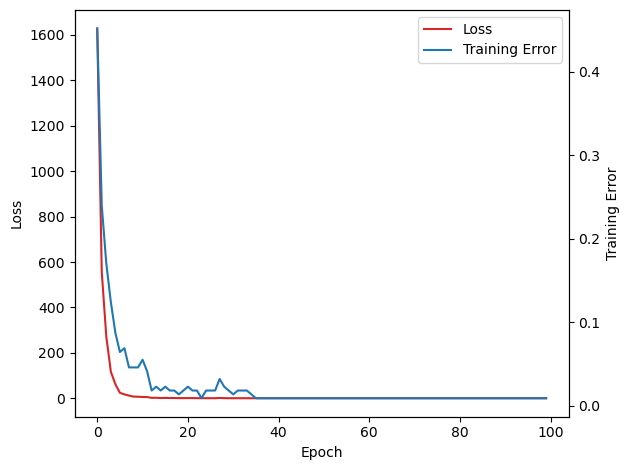

In [91]:
plot_training(losses, error_rates)

In [92]:
from sklearn.model_selection import KFold

def cross_validate_svm(training_features, training_labels):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    best_reg_lambda = None
    best_error_rate = float('inf')

    for reg_lambda in [0.001, 0.01, 0.1, 1, 10, 100]:
        error_rate_sum = 0

        for train_index, test_index in kf.split(training_features):
            X_train, X_test = training_features[train_index], training_features[test_index]
            y_train, y_test = training_labels[train_index], training_labels[test_index]
            beta, b, losses, error_rates = fit_svm(X_train, y_train, reg_lambda=reg_lambda)
            error_count = 0

            for i, X in enumerate(X_test):
                if y_test[i] * (np.dot(X, beta) + b) < 1:
                    error_count += 1
            error_rate = error_count / len(y_test)
            error_rate_sum += error_rate

        avg_error_rate = error_rate_sum / 5
        print(f"Reg lambda: {reg_lambda}, Average error rate: {avg_error_rate}")

        if avg_error_rate < best_error_rate:
            best_error_rate = avg_error_rate
            best_reg_lambda = reg_lambda

    print(f"Best regularization factor: {best_reg_lambda}, Best error rate: {best_error_rate}")
    return best_reg_lambda


In [93]:
cross_validate_svm(X_train, y_svm_train)

Epoch 1, Error rate: 0.5260115606936416
Epoch 2, Error rate: 0.5260115606936416
Epoch 3, Error rate: 0.5260115606936416
Epoch 4, Error rate: 0.5260115606936416
Adjusting learning rate to 0.0002
Epoch 5, Error rate: 0.5260115606936416
Epoch 6, Error rate: 0.5260115606936416
Epoch 7, Error rate: 0.5260115606936416
Adjusting learning rate to 2e-05
Epoch 8, Error rate: 0.5260115606936416
Epoch 9, Error rate: 0.5260115606936416
Epoch 10, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000003e-06
Epoch 11, Error rate: 0.5260115606936416
Epoch 12, Error rate: 0.5260115606936416
Epoch 13, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000004e-07
Epoch 14, Error rate: 0.5260115606936416
Epoch 15, Error rate: 0.5260115606936416
Epoch 16, Error rate: 0.5260115606936416
Adjusting learning rate to 2.0000000000000004e-08
Epoch 17, Error rate: 0.5260115606936416
Epoch 18, Error rate: 0.5260115606936416
Epoch 19, Error rate: 0.5260115606936416
Adjusting lea

100

In [94]:
def predict_svm(X, beta, b):
    predictions = np.sign(np.dot(X, beta) + b)
    return predictions

In [95]:
correct_pred = 0

for i, X in enumerate(X_test):
    pred = predict_svm(X, beta, b)
    if y_svm_test[i] == pred:
        correct_pred +=1

print(f"Accuracy : {correct_pred * 100 / y_svm_test.shape[0]} %")

Accuracy : 98.63013698630137 %


In [96]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC()

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100} %")


Accuracy: 98.63013698630137 %


c:\Users\Jakob\anaconda3\envs\ML_essentials\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
